## Imports

In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from datasets import sample_data

## Summary
The k-Nearest Neighbors (KNN) algorithm is a simple and intuitive classification and regression method in machine learning. It operates on the principle that instances with similar features tend to belong to the same class. KNN is a non-parametric algorithm, meaning it doesn't make any assumptions about the underlying data distribution.

## Goal

Given a dataset $\{\mathbf{X}, \mathbf{Y}\}$:

$$
\mathbf{X} = \begin{bmatrix}
x_{11} & \dots & x_{1d}\\
\vdots & \ddots & \vdots \\
x_{n1} & \dots & x_{nd}
\end{bmatrix}
\quad \text{and} \quad
\mathbf{Y} = \begin{bmatrix}
y_1\\
\vdots\\
y_n
\end{bmatrix}
$$

where the independent variables (also called inputs, predictors, or covariates) are represented by the matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$ and the dependent variable (also known as output, target, label, or response variable) is represented by the vector $\mathbf{Y} \in \mathbb{R}^{n \times 1}$, with $n$ being the number of training examples and $d$ being the number of features. 

The goal is to utilize a supervised learning approach, either for regression or classification tasks, by identifying the $k$ training examples that are closest to a new instance (test point) using a specified distance metric (such as the Euclidean distance). The class (or value) of the new instance is determined through a majority vote (in classification) or by averaging (in regression) the classes (or values) of its $k$ nearest neighbors.

## Distance Metrics

The most common distance metric used in KNN is the Euclidean distance between two points $\mathbf{p}$ and $\mathbf{q}$ in a $d$-dimensional space:

$$
\text{EuclideanDistance}(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{d} (p_i - q_i)^2}
$$

In [27]:
def euclidean_distance(p, q):
#   return np.linalg.norm(p - q)
    return np.sqrt(np.sum(np.square(p - q))) #alternatively

In [28]:
def manhattan_distance(p, q):
    return np.absolute(p - q)

In [29]:
# Example
p = np.array([1,1])
q = np.array([10,1])
print(euclidean_distance(p, q))
print(manhattan_distance(p, q))

9.0
[9 0]


## Model

Let $k$ be the number of neighbors to consider. The predicted class $\hat y$ of the new instance $x$ using KNN can be defined as:

$$
\hat y = \arg\max_{c} \sum_{i=1}^{k} \delta(y_i, c)
$$

where $y_i$ is the class label of the $i$th nearest neighbor of $x$, $c$ is a class label, and $\delta(y_i, c)$ is the Kronecker delta function that equals 1 if $y_i = c$ and 0 otherwise.

To start with, we need an optimal value for $k$. Then we can calculate the distance of each point in the test set with each point in the training set. Then, we selecte the target values from the nearest $k$ neighhbors. For Classification tasks, the Mode of data points corresponding to K top rows will be the predicted output and for Regression tasks, Mean/ Median will be the predicted output.

3. **Regression using KNN:**
In the case of regression, KNN can be used to predict a continuous target value. Given a new instance $x$, the predicted target value $y_{\text{pred}}$ can be calculated as the average of the target values of its k nearest neighbors:

$$
y_{\text{pred}}(x) = \frac{1}{k} \sum_{i=1}^{k} y_i
$$

In [9]:
from scipy import stats

In [10]:
class KNN:
    def __init__(self, k, problem: int=0, metric: int=0):
        self.k = k
        self.problem = problem
        self.metric = metric
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        # Calculate the distances
        m = self.X_train.shape[0]
        n = X_test.shape[0]
        y_pred = []
        
        for i in range(n):
            distance = []
            for j in range(m):
                if self.metric == 0:
                    d = euclidean_distance(X_test[i, :], X_train[j, :])
                else:
                    d = manhattan_distance(X_test[i, :], X_train[j, :])
                distance.append((d, y_train[j]))
            distance = sorted(distance)
            
        # Calculate k-nearest neighbors
        neighbors = []
        for item in range(self.k):
            neighbors.append(distance[item][1])
        
        # Make the predictions
        if self.problem == 0: #Regression
            y_pred.append(np.mean(neighbors))
        else: # Classification
            y_pred.append(stats.mode(neighbors)[0][0])
        return y_pred    

## Comparing with SkLearn Model

In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
iris = load_iris()
data = iris.data
target = iris.target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: x and y must have same first dimension, but have shapes (14,) and (30,)

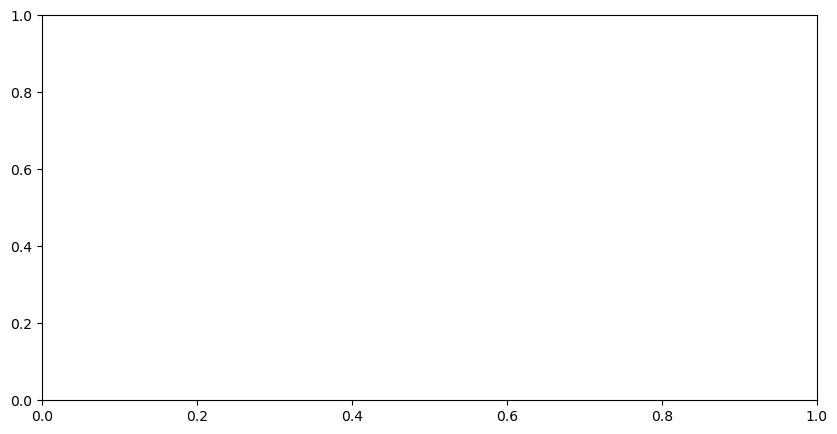

In [13]:
train_error= []
test_error= []

for k in range(1, 31):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    y_pred1= knn.predict(X_train_scaled)
    train_error.append(np.mean(y_train!=y_pred1))

    y_pred2= knn.predict(X_test_scaled)
    test_error.append(np.mean(y_test!=y_pred2))

# Plotting error curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), train_error, color='b', label="Train")
plt.plot(range(1, 15), test_error, color='r', label="Test")
plt.xlabel('Number of nearest neighbors (k)', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title('Finding optimal value of K using error curves', fontsize=18, pad=15)
plt.legend()
plt.show()

In [14]:
knn= KNeighborsClassifier(n_neighbors=14)

# Fitting the data
knn.fit(X_train_scaled,y_train)

# Predicting
y_pred= knn.predict(X_test_scaled)

# Model evaluation
print("Accuracy: ", 100*np.round(accuracy_score(y_test,y_pred), 5), "%")

Accuracy:  96.667 %


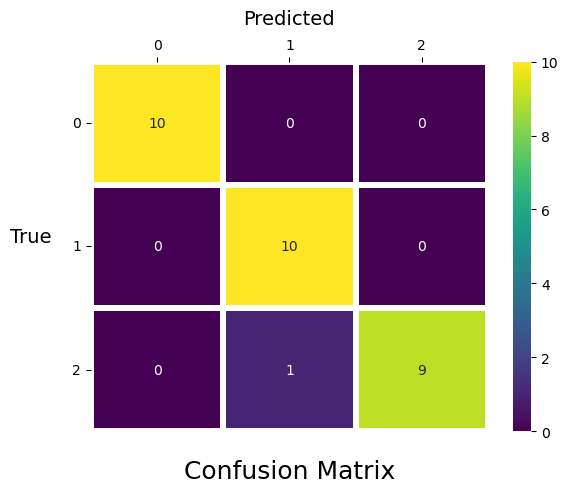

In [15]:
confusionmatrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(confusionmatrix, annot=True, linewidth=3, cmap='viridis')
plt.xlabel("Confusion Matrix", fontsize=18, labelpad=20)
ax.xaxis.tick_top()
plt.ylabel("True", fontsize=14, rotation=0, labelpad=30)
plt.yticks(rotation=0)
plt.title("Predicted", fontsize=14, pad=10)
plt.show()

In [19]:
bknn = KNN(k=14, problem=1, metric=0)
# model fitting
bknn.fit(X_train_scaled, y_train)
# predicting
b_y_pred = bknn.predict(X_test_scaled)

# Model evaluation
print("Accuracy: ", 100*np.round(accuracy_score(y_test,b_y_pred), 5), "%")

/tmp/ipykernel_32464/2316222733.py:36: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred.append(stats.mode(neighbors)[0][0])


ValueError: Found input variables with inconsistent numbers of samples: [30, 1]